###Importing modules

In [2]:
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os


###Path for the dataset

In [0]:
path = '/content/drive/My Drive/dataset/'

###Using ImageDataGenerator to augment images

In [0]:
datagen = ImageDataGenerator(rotation_range=20, zoom_range=0.15,
	width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
	horizontal_flip=True, fill_mode="nearest", preprocessing_function=preprocess_input)

In [5]:
train_generator = datagen.flow_from_directory(path + 'train',
                                              batch_size = 8,
                                              class_mode = 'categorical')

Found 432 images belonging to 2 classes.


Example of one of the samples preprocessed as in VGG16 network.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


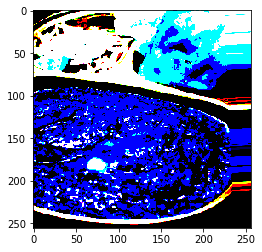

In [6]:
plt.imshow(train_generator[50][0][0])

###Model architecture
The reason for choosing VGG16 is quite simple and justifiable. The VGG16 network is a deep network that was trained on ImageNet and can serve as a good feature extractor. I wanted to balance the trade-off between a heavy and an efficient model. With VGG16, both these parameters are satisfied. The weights are kept unchanged and only the last fully connected layers are newly trained on the given dataset. This ensures that VGG16 gives the most accurate feature extraction.

In [7]:
# load model without classifier layers
model = VGG16(include_top=False)
for layer in model.layers:
	layer.trainable = False
# add new classifier layers
flat1 = GlobalAveragePooling2D()(model.output)
class1 = Dense(256, activation='tanh')(flat1)
#class2 = Dense(256, activation='tanh')(class1)
output = Dense(2, activation='softmax')(class1)
# define new model
model = Model(inputs=model.inputs, outputs=output)
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002), metrics=['accuracy'])
# summarize
model.summary()
# ...

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
58892288/58889256 [==============================] - 2s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None,

###Training the last few layers of the model.

In [8]:
steps = train_generator.n//train_generator.batch_size
hist = model.fit_generator(train_generator, steps_per_epoch=steps, epochs=10)

Epoch 1/10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
54/54 [==============================] - 314s 6s/step - loss: 0.6534 - acc: 0.6528
Epoch 2/10
54/54 [==============================] - 301s 6s/step - loss: 0.4867 - acc: 0.7593
Epoch 3/10
54/54 [==============================] - 298s 6s/step - loss: 0.3943 - acc: 0.8403
Epoch 4/10
54/54 [==============================] - 299s 6s/step - loss: 0.3502 - acc: 0.8472
Epoch 5/10
54/54 [==============================] - 300s 6s/step - loss: 0.3299 - acc: 0.8519
Epoch 6/10
54/54 [==============================] - 300s 6s/step - loss: 0.3136 - acc: 0.8681
Epoch 7/10
54/54 [==============================] - 299s 6s/step - loss: 0.2973 - acc: 0.8727
Epoch 8/10
54/54 [==============================] - 300s 6s/step - loss: 0.2646 - acc: 0.9074
Epoch 9/10
54/54 [==============================] - 300s 6s/step - loss: 0.2578 - acc: 0.9120
Epoch 10/10
54/54 [==============================] - 301s 6s

###Accuracy vs Loss plot

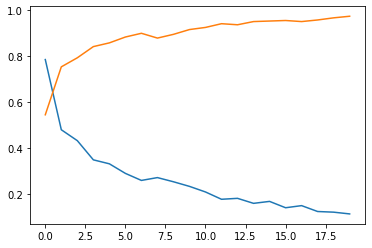

In [0]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['acc'])
plt.show()

###Testing on a seggregated dataset.
Some of the images of the given dataset was kept aside for testing. The testing set contains an equal number of samples for both positive and negative cases.

In [0]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory('drive/My Drive/dataset/test',
                                                 batch_size = 1,
                                                 class_mode = 'categorical')

Found 20 images belonging to 2 classes.


###Accuracy score
An accuracy of >85% was achieved after using Transfer Learning.

In [0]:
print("Accuracy: ", model.evaluate_generator(test_generator)[1]*100, '%')

Accuracy:  85.00000238418579 %
